In [8]:
from keras.preprocessing.text import Tokenizer
import hatespeech as hs
import numpy as np

hsclf = hs.HateSpeechData()
hsclf.read_data("datasets/hs_train.csv")
inputdata = hsclf.dataset.iloc[:, 0]
labeldata = hsclf.dataset.iloc[:,1]

VALIDATION_SET_SIZE = 0.2
mask = np.random.rand(len(inputdata)) <= VALIDATION_SET_SIZE
tX = inputdata[~mask]
tlabels = labeldata[~mask]

vX = inputdata[~mask]
vlabels = labeldata[~mask]


tokenizer = Tokenizer()
tokenizer.fit_on_texts(inputdata)

X_train = tokenizer.texts_to_sequences(tX)
y_train = tlabels

X_validate = tokenizer.texts_to_sequences(vX)
y_validate = vlabels


vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index


print(inputdata[2])
print(X_train[2])

@skroskz @shossy2 @JoeBiden Biden &amp; his son Hunter took advantage of their position to use Air Force 2 to wheel &amp; deal with China &amp; Ukraine! I don’t trust Biden or his son Hunter who left his wife &amp; kids to move in with his dead brother’s wife &amp; family! #DOUCHEBAG
[25, 152, 1883, 6, 1281, 428, 4681, 13, 7119]


In [9]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_validate = pad_sequences(X_validate, padding='post', maxlen=maxlen)



In [10]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           1010800   
_________________________________________________________________
flatten_2 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,060,821
Trainable params: 1,060,821
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train,
                    epochs=4,
                    verbose=True,
                    validation_split = 0.2,
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_validate, y_validate, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


c:\users\mrityunjayk\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 3376 samples, validate on 845 samples
Epoch 1/20
3376/3376 [==============================] - 8s 2ms/step - loss: 0.6632 - accuracy: 0.6126 - val_loss: 0.6428 - val_accuracy: 0.6355
Epoch 2/20
3376/3376 [==============================] - 7s 2ms/step - loss: 0.4126 - accuracy: 0.8158 - val_loss: 0.6887 - val_accuracy: 0.6249
Epoch 3/20
3376/3376 [==============================] - 7s 2ms/step - loss: 0.0828 - accuracy: 0.9802 - val_loss: 0.7759 - val_accuracy: 0.6059
Epoch 4/20
3376/3376 [==============================] - 7s 2ms/step - loss: 0.0402 - accuracy: 0.9899 - val_loss: 0.8359 - val_accuracy: 0.5822
Epoch 5/20
3376/3376 [==============================] - 7s 2ms/step - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.8672 - val_accuracy: 0.5882
Epoch 6/20
3376/3376 [==============================] - 8s 2ms/step - loss: 0.0231 - accuracy: 0.9941 - val_loss: 0.9037 - val_accuracy: 0.6237
Epoch 7/20
3376/3376 [==============================] - 8s 2ms/step - loss: 0.0177 - accu

NameError: name 'plot_history' is not defined

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


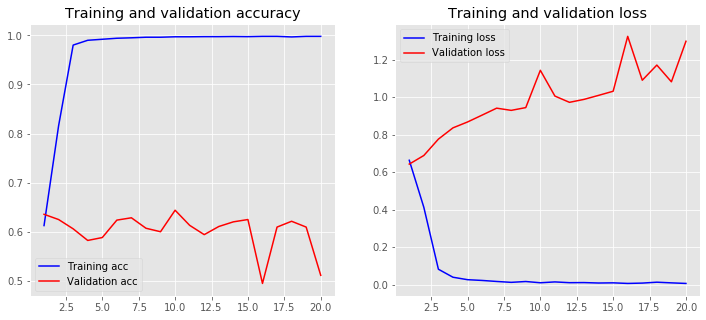

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

print(history.history.keys())

plot_history(history)

In [20]:
predicted_labels = model.predict_classes(X_validate)
accuracy_score, f1score = hsclf.metric_score(vlabels, predicted_labels)
print("Accuracy: ", accuracy_score, " F1 score: ", f1score)


Accuracy:  0.900497512437811  F1 score:  0.9157641395908545


In [61]:
import pandas as pd

data = pd.read_csv('datasets/hs_test.csv')
#print(dataset.columns)
testdata = data.iloc[:, 0]
X_test = tokenizer.texts_to_sequences(testdata)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


print(testdata[2])
predicted_labels = model.predict_classes(X_test).reshape(-1)
print(predicted_labels.shape)
print(predicted_labels[0])
wfile = open('hs_testout.csv', 'w', encoding="utf-8")

#wstring = str(testdata[i]) + '\t' + str(predicted_labels[i]) + '\n'
wfile.write("labels\n")
for i in range(len(predicted_labels)):
    wstring = str(predicted_labels[i]) + '\n'
    wfile.write(wstring)

wfile.close()
        


Candle light silent protest in MYSORE, by Mysore Medical College &amp; Research Institute (MMCRI)  in support to NRSMCH assault on doctors... #DoctorsFightBack  #SaveTheDoctors #SaveBengal   @republic @ndtv @timesofindia @publictvnews @suvarnanewstv @IndiaToday @SwamiGeetika https://t.co/JdKMsFTIFZ
(586,)
1


In [ ]:
df = DataFrame('')